In [7]:
import cv2 as cv
import matplotlib.pyplot as plt
from transformers import ResNetForImageClassification
from PIL import Image
import requests
import torchvision.transforms as transforms
import torch
from datasets import load_dataset
import numpy as np

In [9]:
dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0]


C:\Users\thedh\anaconda3\envs\newDeep\lib\site-packages\datasets\load.py:1429: FutureWarning: The repository for huggingface/cats-image contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/huggingface/cats-image
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [21]:
model_checkpoint = 'microsoft/resnet-50'
model = ResNetForImageClassification.from_pretrained(model_checkpoint)

In [17]:
img = cv.imread('cats.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [18]:
## ResNet part

In [20]:
model_checkpoint = 'microsoft/resnet-50'
model = ResNetForImageClassification.from_pretrained(model_checkpoint)



RuntimeError: requested resize to (224, 224) ((224, 224) elements in total), but the given tensor has a size of 3x224x224 (150528 elements). autograd's resize can only change the shape of a given tensor, while preserving the number of elements. 

In [13]:
inputs = processor(image, return_tensors="pt")


In [13]:
with torch.no_grad():
  logits = model(**inputs).logits

print(logits.shape)

In [14]:
predicted_label = logits.argmax(-1).item()


In [15]:
from torch.nn import Sequential, Linear, Flatten

new_model = model
new_model.classifier = Sequential(
  Flatten(start_dim=1, end_dim=-1)
)

In [16]:
inputs = processor(image, return_tensors="pt")

with torch.no_grad():
  logits = new_model(**inputs).logits

print(logits.shape)

NameError: name 'processor' is not defined

In [33]:
## ORB  part

In [39]:
orb = cv.ORB_create(64)


In [40]:
kp = orb.detect(img,None)


In [41]:
kp, des = orb.compute(img, kp)


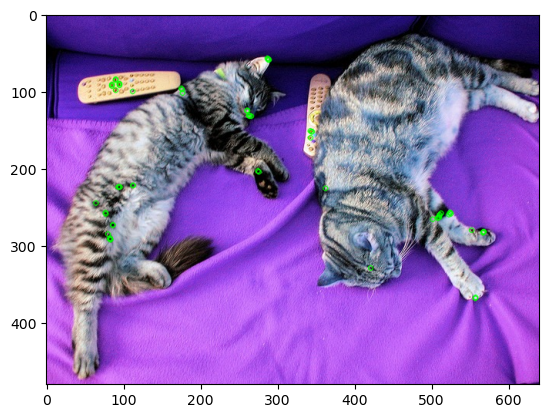

(<matplotlib.image.AxesImage at 0x14547d54580>, None)

In [42]:
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

In [43]:

des_np = np.array(des)
des_flattened = des_np.flatten()

des_flattened.shape

(2048,)

In [44]:
logits

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0794, 0.0000]])

In [47]:
des_flattened = des_flattened.reshape((1,2048))

In [51]:
logits = np.array(logits)

In [53]:
combined = np.vstack((logits,des_flattened))